In [1]:
from ctd.comparison.analysis.tt.tt import Analysis_TT
from ctd.comparison.analysis.dt.dt import Analysis_DT
from ctd.comparison.comparison import Comparison
import dotenv
import os
import sys
# import environment variables
dotenv.load_dotenv(override=True)
HOME_DIR = os.getenv("HOME_DIR")
print(HOME_DIR)


/home/csverst/Github/CtDBenchmark/


In [3]:
tt_path = HOME_DIR + "content/trained_models/task-trained/tt_3bff/"
tt_analysis = Analysis_TT(run_name = "tt_3bff",filepath=tt_path)

# REPLACE THESE PATHS WITH YOUR OWN DT MODEL PATHS
#gru_sweep_path = tt_path + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240611_GRU_Resim3bff_Test/"
#node_sweep_path = tt_path + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240611_NODE_Resim3bff_Test/"
#lds_sweep_path = tt_path + "n_neurons_50_obs_noise_pseudoPoisson_dispersion_1.0_see/20240611_LDS_Resim3bff_Test/"

gru_subfolders = [f.path for f in os.scandir(gru_sweep_path) if f.is_dir()]
node_subfolders = [f.path for f in os.scandir(node_sweep_path) if f.is_dir()]
lds_subfolders = [f.path for f in os.scandir(lds_sweep_path) if f.is_dir()]


In [4]:
comparison = Comparison(comparison_tag = "3BFF_GRU")
comparison.load_analysis(tt_analysis, group = "TT", reference_analysis=True)
for subfolder in gru_subfolders:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_GRU, group = "GRU")

for subfolder in node_subfolders:
    subfolder = subfolder + "/"
    analysis_Node = Analysis_DT(run_name = "Node", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_Node, group = "Node")

for subfolder in lds_subfolders:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DT(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_LDS, group = "LDS")
    

Working on 1 of 16: tt_3bff
Group: TT
Working on 2 of 16: GRU
Group: GRU
Rate R2: 0.9133606527054609
State R2: 0.866352288843249
Working on 3 of 16: GRU
Group: GRU
Rate R2: 0.9171255605383669
State R2: 0.8853199012890199
Working on 4 of 16: GRU
Group: GRU
Rate R2: 0.9135612366919207
State R2: 0.8707326119942684
Working on 5 of 16: GRU
Group: GRU
Rate R2: 0.9244973619500358
State R2: 0.8744603641141447
Working on 6 of 16: GRU
Group: GRU
Rate R2: 0.9141106363012967
State R2: 0.8762176729015114
Working on 7 of 16: Node
Group: Node
Rate R2: 0.893555287700513
State R2: 0.9570788896597514
Working on 8 of 16: Node
Group: Node
Rate R2: 0.8743699681810714
State R2: 0.935922340748671
Working on 9 of 16: Node
Group: Node
Rate R2: 0.8833041541828948
State R2: 0.9426210912655638
Working on 10 of 16: Node
Group: Node
Rate R2: 0.8786322871193798
State R2: 0.9518648520657581
Working on 11 of 16: Node
Group: Node
Rate R2: 0.8867720218233734
State R2: 0.9501432388814434
Working on 12 of 16: LDS
Group: L

array([[0.        , 0.        ],
       [0.91336065, 0.86635229],
       [0.91712556, 0.8853199 ],
       [0.91356124, 0.87073261],
       [0.92449736, 0.87446036],
       [0.91411064, 0.87621767],
       [0.89355529, 0.95707889],
       [0.87436997, 0.93592234],
       [0.88330415, 0.94262109],
       [0.87863229, 0.95186485],
       [0.88677202, 0.95014324],
       [0.35244573, 0.44579467],
       [0.34794484, 0.44909642],
       [0.35123022, 0.4473281 ],
       [0.34988075, 0.45096547],
       [0.34056293, 0.44492858]])

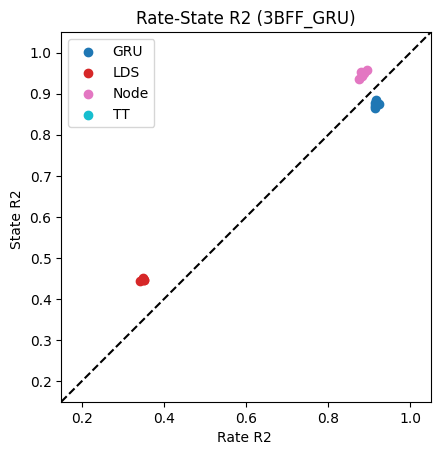

In [5]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
comparison.compare_rate_state_r2(plot_dict=plot_dict)